In [19]:
# import two_atom_interaction.py
from two_atom_interaction import *
# keep track of time
import time

pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 3, 15) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (2.0, 2.0, 2.0), # 2.0
    T_uK_Cs = (1.5, 1.5, 1.5), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 20,  # number of Monte Carlo samples per detuning
    N_steps = 10,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)


### Initial testing

In [20]:
# ---------------------------------
# Main simulation
# ---------------------------------

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

# (A) with interaction
start_time = time.time()
d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

# (B) without interaction
start_time = time.time()
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
print(f"time for (B) without interaction: {time.time() - start_time:.1f} s")

# (C) without broadening
start_time = time.time()
d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (C) without broadening: {time.time() - start_time:.1f} s")

print("Simulation done.")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.2 s
Starting detuning scan...
  Point 2/15 - Elapsed: 0.6s, Est. remaining: 3.6s
  Point 4/15 - Elapsed: 1.6s, Est. remaining: 4.4s
  Point 6/15 - Elapsed: 2.6s, Est. remaining: 4.0s
  Point 8/15 - Elapsed: 3.7s, Est. remaining: 3.2s
  Point 10/15 - Elapsed: 4.7s, Est. remaining: 2.4s
  Point 12/15 - Elapsed: 5.8s, Est. remaining: 1.4s
  Point 14/15 - Elapsed: 6.8s, Est. remaining: 0.5s
time for (A) with interaction: 7.9 s
Starting detuning scan...
  Point 2/15 - Elapsed: 0.0s, Est. remaining: 0.1s
  Point 4/15 - Elapsed: 0.1s, Est. remaining: 0.1s
  Point 6/15 - Elapsed: 0.1s, Est. remaining: 0.1s
  Point 8/15 - Elapsed: 0.1s, Est. remaining: 0.1s
  Point 10/15 - Elapsed: 0.2s, Est. remaining: 0.1s
  Point 12/15 - Elapsed: 0.2s, Est. remaining: 0.0s
  Point 14/15 - Elapsed: 0.2s, Est. remaining: 0.0s
time for (B) without interaction: 0.

Experiment Configuration:
  R_mean_um: 5.655
  R_axis_um: (1.0, 0.0, 0.0)
  OMEGA_Na_Hz: 500000.0
  OMEGA_Cs_Hz: 0
  Delta_scan_Hz: [-1000000.          -714285.71428571  -428571.42857143  -142857.14285714
   142857.14285714   428571.42857143   714285.71428571  1000000.
  1285714.28571429  1571428.57142857  1857142.85714286  2142857.14285714
  2428571.42857143  2714285.71428571  3000000.        ]
  t_wait_s: 0.0
  T_uK_Na: (2.0, 2.0, 2.0)
  T_uK_Cs: (1.5, 1.5, 1.5)
  omega_trap_Na_Hz: (230000.0, 230000.0, 37000.0)
  omega_trap_Cs_Hz: (100000.0, 100000.0, 20000.0)
  T2_Na_s: 5e-06
  T2_Cs_s: 2e-05
  T1_use_ARC: True
  broadening: True
  N_mc: 20
  N_steps: 10
  seed: 1234
  n_Na: 51
  n_Cs: 54
  l_Na: 0
  l_Cs: 0
  j_Na: 0.5
  j_Cs: 0.5
  load_depth_T_Na: 350
  load_depth_T_Cs: 100
  load_factor: 0.1
  plot_displacements: False
  displacement_list: [np.float64(6.220333226022549), np.float64(6.476175349740514), np.float64(5.577204839017306), np.float64(5.690586846918593), np.float64(6.549

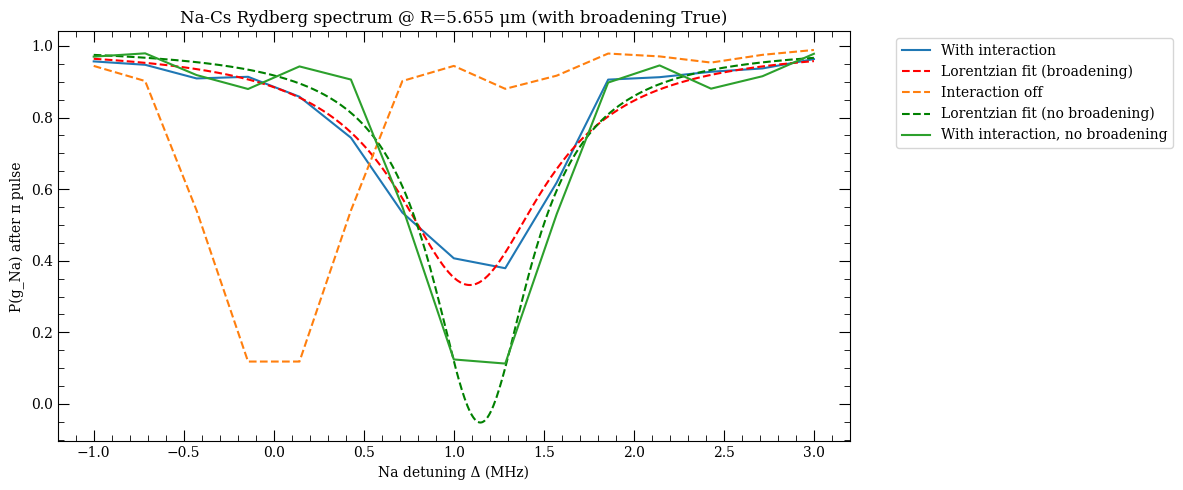

In [21]:
# plotting
if True:
    # print experiment configurations for reference
    print("Experiment Configuration:")
    for field_name, field_value in cfg.__dict__.items():
        print(f"  {field_name}: {field_value}")

print("---------------------------------")
# fit broadened data to Lorentzian
popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
print(f"(broadening) \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
# fit non-broadened data to Lorentzian
popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
print(f"(no broadening) \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")


plt.figure(figsize=(12,5))
plt.plot(d * 1e-6, P_int, label="With interaction")
# plot fitted Lorentzian
d_fit = np.linspace(min(d), max(d), 500)
plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "r--", label="Lorentzian fit (broadening)")
plt.plot(d * 1e-6, P_no, "--", label="Interaction off")
# plot fitted Lorentzian for no broadening
plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt_nb), "g--", label="Lorentzian fit (no broadening)")
plt.plot(d * 1e-6, P_no_broad, "-", label="With interaction, no broadening")
plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ R={cfg.R_mean_um} μm (with broadening {cfg.broadening})")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

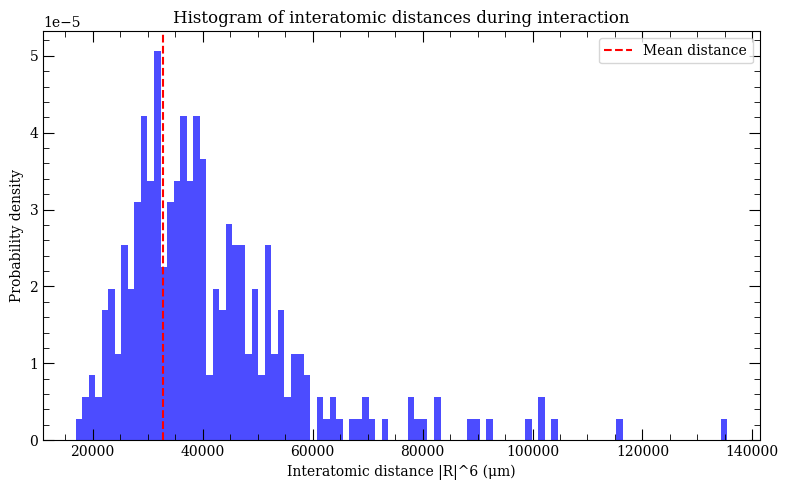

In [22]:
# plot displacement histogram.
plt.figure(figsize=(8,5))
all_displacements = (np.array(cfg.displacement_list))**6
plt.hist(all_displacements, bins=100, density=True, alpha=0.7, color='blue')
plt.xlabel("Interatomic distance |R|^6 (μm)")
plt.ylabel("Probability density")
plt.title("Histogram of interatomic distances during interaction")
plt.axvline((cfg.R_mean_um)**6, color='red', linestyle='--', label='Mean distance')
plt.legend()
plt.tight_layout()
plt.show()

## Sweeping the displacement for Na-Cs

### At finite temperature

In [30]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (2.0, 2.0, 2.0), # 2.0
    T_uK_Cs = (1.5, 1.5, 1.5), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.2 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 1.0s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.6s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.7s, Est. remaining: 0.8s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.1s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.4s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.6s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.7s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 1.3s, Est. remaining: 18.0s
  Point 4/30 - Elapsed: 3.9s, Est. remaining: 25.2s
  Point 6/30 - Elapsed: 6.5s, Est. remaining: 26.2s
  Point 8/30 - E

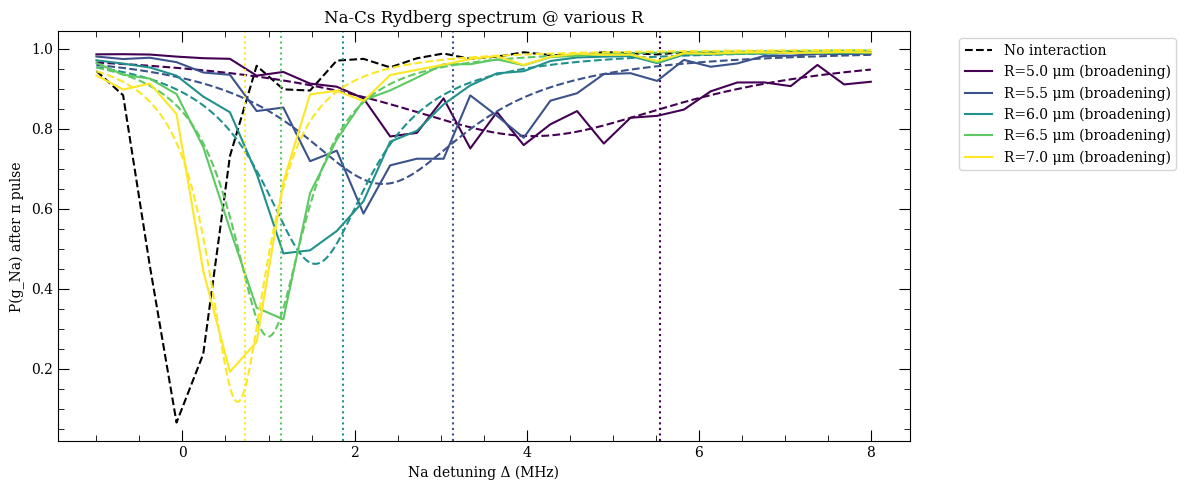

In [31]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### At Zero temperature, same sweep.

In [34]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (0.0, 0.0, 0.0), # 2.0
    T_uK_Cs = (0.0, 0.0, 0.0), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 1.0s
  Point 6/30 - Elapsed: 0.3s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 1.0s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.6s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.7s, Est. remaining: 0.8s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.2s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.4s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.5s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.7s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.8s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 1.4s, Est. remaining: 19.3s
  Point 4/30 - Elapsed: 4.1s, Est. remaining: 27.0s
  Point 6/30 - Elapsed: 6.9s, Est. remaining: 27.5s
  Point 8/30 - E

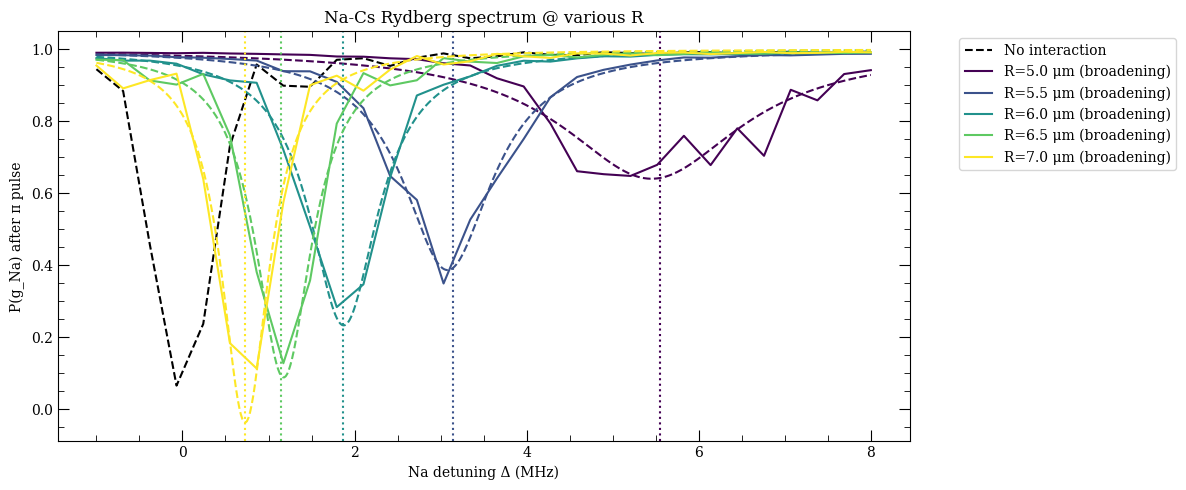

In [36]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting

    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Ground state for Cs ($T=0$) and Thermal state for Na ($T \ne 0$)

In [37]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (2.0, 2.0, 2.0), # 2.0
    T_uK_Cs = (0.0, 0.0, 0.0), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.2 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.7s, Est. remaining: 0.8s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.2s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.4s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.6s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.7s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 1.4s, Est. remaining: 19.9s
  Point 4/30 - Elapsed: 4.2s, Est. remaining: 27.3s
  Point 6/30 - Elapsed: 6.9s, Est. remaining: 27.4s
  Point 8/30 - E

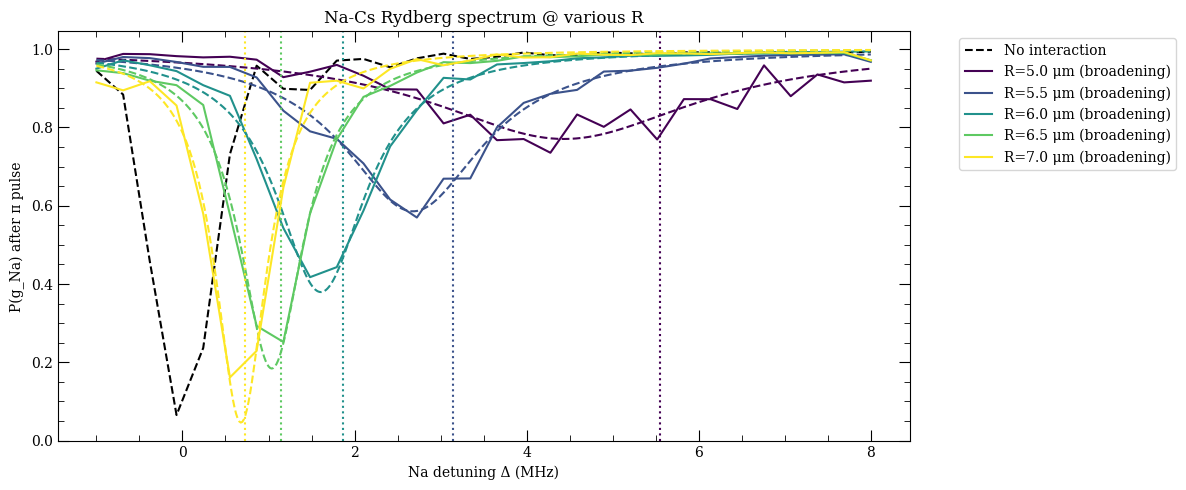

In [38]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting

    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Ground state for Na ($T=0$) and Thermal state for Cs ($T \ne 0$)

In [41]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (0.0, 0.0, 0.0), # 2.0
    T_uK_Cs = (1.5, 1.5, 1.5), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.2 s


Starting detuning scan...
  Point 2/30 - Elapsed: 0.1s, Est. remaining: 0.7s
  Point 4/30 - Elapsed: 0.1s, Est. remaining: 0.9s
  Point 6/30 - Elapsed: 0.2s, Est. remaining: 1.0s
  Point 8/30 - Elapsed: 0.3s, Est. remaining: 0.9s
  Point 10/30 - Elapsed: 0.4s, Est. remaining: 0.9s
  Point 12/30 - Elapsed: 0.5s, Est. remaining: 0.8s
  Point 14/30 - Elapsed: 0.6s, Est. remaining: 0.7s
  Point 16/30 - Elapsed: 0.8s, Est. remaining: 0.7s
  Point 18/30 - Elapsed: 0.9s, Est. remaining: 0.6s
  Point 20/30 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 22/30 - Elapsed: 1.2s, Est. remaining: 0.4s
  Point 24/30 - Elapsed: 1.3s, Est. remaining: 0.3s
  Point 26/30 - Elapsed: 1.5s, Est. remaining: 0.2s
  Point 28/30 - Elapsed: 1.6s, Est. remaining: 0.1s
  Point 30/30 - Elapsed: 1.8s, Est. remaining: 0.0s
Starting detuning scan...
  Point 2/30 - Elapsed: 1.3s, Est. remaining: 18.7s
  Point 4/30 - Elapsed: 4.1s, Est. remaining: 26.4s
  Point 6/30 - Elapsed: 6.7s, Est. remaining: 26.9s
  Point 8/30 - E

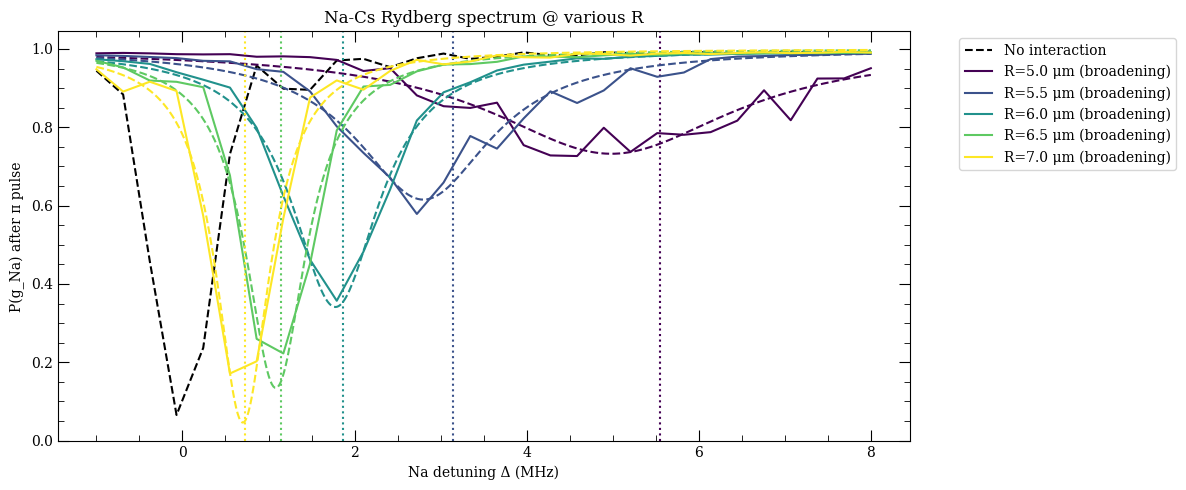

In [42]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting

    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Sweeping the displacement for Cs-Cs

### Finite temperature case ($T \ne 0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (1.5, 1.5, 1.5), # 2.0
    T_uK_Cs = (1.5, 1.5, 1.5), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram

    mass_Na = Cesium().mass # override Na mass to Cs mass this simulation
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

In [ ]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Zero temperature case ($T=0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (0.0, 0.0, 0.0), # 2.0
    T_uK_Cs = (0.0, 0.0, 0.0), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram

    mass_Na = Cesium().mass # override Na mass to Cs mass this simulation
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

In [ ]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Sweeping the displacement for Na-Na

### Finite temperature case ($T \ne 0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (1.5, 1.5, 1.5), # 2.0
    T_uK_Cs = (1.5, 1.5, 1.5), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram

    mass_Na = Cesium().mass # override Na mass to Cs mass this simulation
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

In [ ]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Zero temperature case ($T=0$)

In [ ]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 8, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (0.0, 0.0, 0.0), # 2.0
    T_uK_Cs = (0.0, 0.0, 0.0), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 50,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram

    mass_Na = Cesium().mass # override Na mass to Cs mass this simulation
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

In [ ]:
initial_dist_list = [5.0, 5.5, 6.0, 6.5, 7.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(initial_dist_list)))

broadened_data = {}
non_broadened_data = {}

plt.figure(figsize=(12,5))
# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for R_initial, color in zip(initial_dist_list, colors):
    cfg.R_mean_um = R_initial * pixel_to_um

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    broadened_data[R_initial] = P_int

    # (B) with interaction + no broadening
    start_time = time.time()
    d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
    print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
    # fit non-broadened data to Lorentzian
    popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
    center = popt_nb[1] # find the center from no broadening fit for plotting
    non_broadened_data[R_initial] = popt_nb
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"R={R_initial} μm (broadening)", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)
    # plot the line at center from no broadening
    plt.axvline(center*1e-6, linestyle=':', color=color)

    print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ various R")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Parking at one distance and sweeping the trap depth of both atoms. (finite temps)

In [55]:
pixel_to_um = 0.87 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(
    R_mean_um = 6.0 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_Na_Hz = 5.0e5,  # Na Rabi frequency (Hz)
    OMEGA_Cs_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg

    Delta_scan_Hz = np.linspace(-1, 5, 20) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_Na = (2.0, 2.0, 2.0), # 2.0
    T_uK_Cs = (1.5, 1.5, 1.5), # 1.5

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_Na_Hz = (230e3, 230e3, 37e3), # using values from ryan 29Oct
    omega_trap_Cs_Hz = (100e3, 100e3, 20e3),

    load_factor = np.sqrt(0.01),  # % of trap depth after dropping 

    T2_Na_s = 5e-6, # coherence time for Na
    T2_Cs_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 10,  # number of Monte Carlo samples per detuning
    N_steps = 20,  # number of time steps in evolution
    
    load_depth_T_Na = 350, # uK
    load_depth_T_Cs = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_na_cs_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -37.57467761041112 GHz·μm^6
C6 (Na 51S - Cs 54S) = 2.361e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 37.575 GHz·μm^6
time for C6 calculation: 0.2 s


Starting detuning scan...
  Point 2/50 - Elapsed: 0.2s, Est. remaining: 4.6s
  Point 4/50 - Elapsed: 0.6s, Est. remaining: 6.5s
  Point 6/50 - Elapsed: 0.9s, Est. remaining: 6.8s
  Point 8/50 - Elapsed: 1.3s, Est. remaining: 6.8s
  Point 10/50 - Elapsed: 1.7s, Est. remaining: 6.6s
  Point 12/50 - Elapsed: 2.0s, Est. remaining: 6.4s
  Point 14/50 - Elapsed: 2.4s, Est. remaining: 6.1s
  Point 16/50 - Elapsed: 2.7s, Est. remaining: 5.8s
  Point 18/50 - Elapsed: 3.1s, Est. remaining: 5.5s
  Point 20/50 - Elapsed: 3.5s, Est. remaining: 5.2s
  Point 22/50 - Elapsed: 3.9s, Est. remaining: 4.9s
  Point 24/50 - Elapsed: 4.3s, Est. remaining: 4.6s
  Point 26/50 - Elapsed: 4.7s, Est. remaining: 4.3s
  Point 28/50 - Elapsed: 5.1s, Est. remaining: 4.0s
  Point 30/50 - Elapsed: 5.5s, Est. remaining: 3.7s
  Point 32/50 - Elapsed: 5.9s, Est. remaining: 3.3s
  Point 34/50 - Elapsed: 6.3s, Est. remaining: 3.0s
  Point 36/50 - Elapsed: 6.8s, Est. remaining: 2.6s
  Point 38/50 - Elapsed: 7.2s, Est. remain

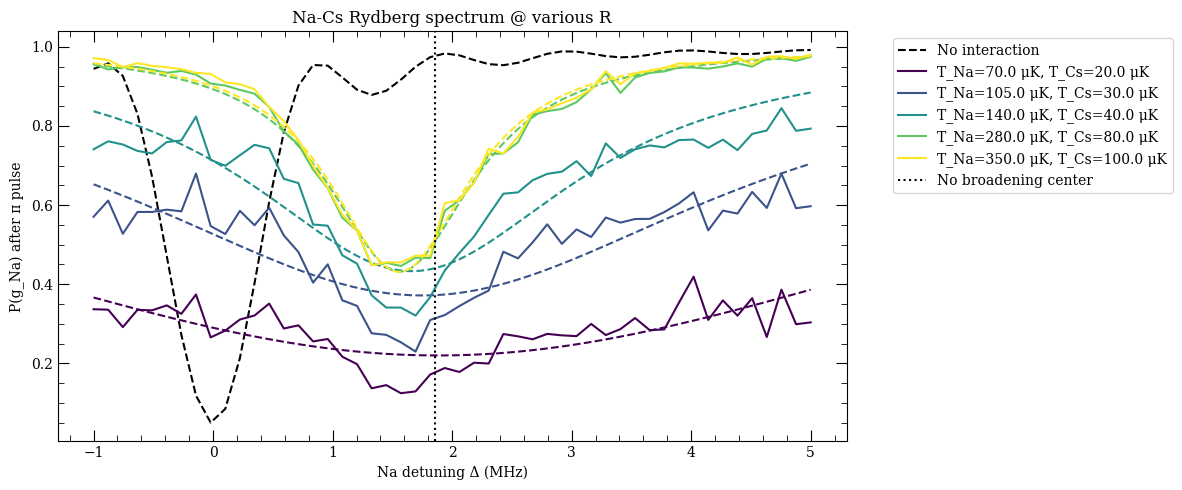

In [ ]:
load_depths_Na = np.array([0.2, 0.3, 0.4, 0.8, 1.0]) * 350 # in uK
load_depths_Cs = np.array([0.2, 0.3, 0.4, 0.8, 1.0]) * 100 # in uK
temps_Na = np.sqrt(np.array([0.2, 0.3, 0.4, 0.8, 1.0])) * 2 # in uK
temps_Cs = np.sqrt(np.array([0.2, 0.3, 0.4, 0.8, 1.0])) * 1.5 # in uK
trap_freq_Na_radial = np.sqrt(np.array([0.2, 0.3, 0.4, 0.8, 1.0])) * 230e3 # in Hz
trap_freq_Na_axial = np.sqrt(np.array([0.2, 0.3, 0.4, 0.8, 1.0])) * 37e3 # in Hz
trap_freq_Cs_radial = np.sqrt(np.array([0.2, 0.3, 0.4, 0.8, 1.0])) * 100e3 # in Hz
trap_freq_Cs_axial = np.sqrt(np.array([0.2, 0.3, 0.4, 0.8, 1.0])) * 20e3 # in Hz

colors = plt.cm.viridis(np.linspace(0, 1, len(load_depths_Na)))

plt.figure(figsize=(12,5))


# simulate for no interaction
d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# plot no interaction case for reference
plt.plot(d * 1e-6, P_no, "k--", label="No interaction")

for depth_Na, depth_Cs, color in zip(load_depths_Na, load_depths_Cs, colors):
    cfg.load_depth_T_Na = depth_Na
    cfg.load_depth_T_Cs = depth_Cs

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")
    # fit broadened data to Lorentzian
    popt, _ = curve_fit(lorentzian, d, P_int, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
    print(f"(broadening) T_Na={depth_Na:.1f} μK, T_Cs={depth_Cs:.1f} μK \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    # print(f"(broadening) R={R_initial} \n Shift={popt[1]*1e-6:.3f} MHz, Broadening={popt[2]*1e-6:.3f} MHz, Amplitude={popt[0]:.3f}")
    
    # plot interaction + broadening
    plt.plot(d * 1e-6, P_int, label=f"T_Na={depth_Na:.1f} μK, T_Cs={depth_Cs:.1f} μK", color=color)
    # plot fitted Lorentzian
    d_fit = np.linspace(min(d), max(d), 500)
    plt.plot(d_fit * 1e-6, lorentzian(d_fit, *popt), "--", color=color)

# (B) with interaction + no broadening
start_time = time.time()
d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (B) without broadening: {time.time() - start_time:.1f} s")
# fit non-broadened data to Lorentzian
popt_nb, _ = curve_fit(lorentzian, d, P_no_broad, p0=[0.7, 0.6e6, 1e6]) # where p0 is initial guess for [A, x0, gamma] = amplitude, center, width
print(f"(no broadening) T_Na={depth_Na:.1f} μK, T_Cs={depth_Cs:.1f} μK \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
# print(f"(no broadening) R={R_initial} \n Shift={popt_nb[1]*1e-6:.3f} MHz, Broadening={popt_nb[2]*1e-6:.3f} MHz, Amplitude={popt_nb[0]:.3f}")
center = popt_nb[1] # find the center from no broadening fit for plotting

# plot the line at center from no broadening
plt.axvline(center*1e-6, linestyle=':', color='black', label="No broadening center")

print("Simulation done.")

plt.xlabel("Na detuning Δ (MHz)")
plt.ylabel("P(g_Na) after π pulse")
plt.title(f"Na-Cs Rydberg spectrum @ R = {cfg.R_mean_um:.1f} μm")
# put legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()